## Analysis code for Wolpe et al. 2023

In [1]:
# This code was written by Dr Aya Vituri in 2023 and edited by Dr Noham Wolpe

In [3]:
# Build a network
import networkx as nx

# Read an excel file
import pandas as pd

# Concatenate rows to dataframes
import numpy as np

import statistics

# Generate random numbers
import random

import matplotlib.pyplot as plt
from scipy.special import entr
from sklearn.metrics import mutual_info_score

import community as community_louvain

# display a graph with its communities:
# as Erdos-Renyi graphs don't have true community structure,
# instead load the karate club graph
import matplotlib.cm as cm


# adjusted_rand_score - Rand index adjusted for chance.
# sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)
# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples
# and counting pairs that are assigned in the same or different clusters in the predicted and true
# clusterings.
# The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
# The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of
# the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a
# permutation). ARI is a symmetric measure:
# adjusted_rand_score(a, b) == adjusted_rand_score(b, a)
import sklearn

# t-test: scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate',
# alternative='two-sided')
import scipy.stats

# change order of dictionary
import collections

In [4]:
def calc_MI(x, y, bins=10):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

## Analysis for all patients including those with 1 assessment

In [5]:
df_all = pd.read_csv ('/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Database/Wolpe_Noham_20_8_23.csv')

In [6]:

df_all = df_all[['ClientID', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
                                       'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                       'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
                                       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                                       'SESleep']]

In [7]:
for col in df_all.columns:
    print(col)

ClientID
P1
P2
P3
P4
P5
P6
P7
ANH1
ANH2
ANH3
ASO5
ASO6
AVO7
AVO8
BLU9
BLU10
BLU11
ALO12
ALO13
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
SESleep


In [8]:
df_all = df_all.dropna().copy()
print(df_all.shape)

(502, 30)


In [9]:
df_all['Psychosis'] = df_all[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']].mean(axis=1)
df_all['Depression'] = df_all[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']].mean(axis=1)
df_all['Anhedonia'] = df_all[['ANH1', 'ANH2', 'ANH3']].mean(axis=1)
df_all['Asociality'] = df_all[['ASO5', 'ASO6']].mean(axis=1)
df_all['Avolition'] = df_all[['AVO7', 'AVO8']].mean(axis=1)
df_all['BluntedAffect'] = df_all[['BLU9', 'BLU10', 'BLU11']].mean(axis=1)
df_all['Alogia'] = df_all[['ALO12', 'ALO13']].mean(axis=1)
print(df_all.head())
print(df_all.shape)


    ClientID   P1   P2   P3   P4   P5   P6   P7  ANH1  ANH2  ...   Q8   Q9  \
4         15  1.0  1.0  5.0  1.0  1.0  1.0  1.0   1.0   1.0  ...  0.0  0.0   
7         15  1.0  1.0  4.0  1.0  1.0  2.0  1.0   2.0   3.0  ...  0.0  0.0   
20       232  3.0  2.0  2.0  1.0  1.0  2.0  1.0   1.0   0.0  ...  0.0  1.0   
24       232  1.0  1.0  3.0  1.0  1.0  1.0  1.0   0.0   1.0  ...  0.0  1.0   
25       232  2.0  1.0  3.0  1.0  1.0  3.0  1.0   0.0   2.0  ...  0.0  1.0   

    SESleep  Psychosis  Depression  Anhedonia  Asociality  Avolition  \
4      10.0   1.571429    0.111111   1.000000         3.0        1.5   
7       9.0   1.571429    0.444444   2.000000         4.0        2.0   
20      9.0   1.714286    0.444444   0.666667         0.0        0.5   
24      8.0   1.285714    0.444444   0.333333         1.0        0.5   
25      8.0   1.714286    0.666667   0.666667         0.0        2.0   

    BluntedAffect  Alogia  
4        1.000000     1.0  
7        0.000000     0.0  
20       0.666

In [11]:
for col in df_all.columns:
    print(col)

ClientID
P1
P2
P3
P4
P5
P6
P7
ANH1
ANH2
ANH3
ASO5
ASO6
AVO7
AVO8
BLU9
BLU10
BLU11
ALO12
ALO13
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
SESleep
Psychosis
Depression
Anhedonia
Asociality
Avolition
BluntedAffect
Alogia


In [12]:
len_df_all = len(df_all)
len_df_all

502

In [13]:
# The unique ClientsIDs
Clients = df_all['ClientID'].unique()
nClients = df_all['ClientID'].nunique()
nClients

195

In [14]:
## How many patients have n assessments, for n = 1, 2, 3, ...

assessments_counts = df_all['ClientID'].value_counts()
assessments_counts

ClientID
2313    6
2374    6
2382    6
2225    5
2302    5
       ..
2494    1
2497    1
2284    1
2502    1
2545    1
Name: count, Length: 195, dtype: int64

In [15]:
assessments_counts.value_counts()

count
2    57
3    54
1    42
4    29
5    10
6     3
Name: count, dtype: int64

In [23]:
## Make a dataframe of just the patients who have at least 2 assessments (rows)

at_least_2_Clients = [0 for i in range(nClients)]

# Declare a list that will be added as a column to the dataframe 
at_least_2 = [0 for i in range(len_df_all)]

# Current row in the dataframe
j = 0

for i in range(nClients):
    df_client = df_all.loc[df_all['ClientID'] == Clients[i]]
    num_of_client_rows = (df_client.shape[0])
    if num_of_client_rows >=2:
        at_least_2_Clients[i] = 1
        at_least_2[j : (j + num_of_client_rows)] = [1 for i in range(num_of_client_rows)]
    j = j + num_of_client_rows



In [26]:
df_all['at_least_2'] = at_least_2

In [29]:
df_all_at_least_2 = df_all.loc[df_all['at_least_2'] == 1]
df_all_at_least_2

,ClientID,P1,P2,P3,P4,P5,P6,P7,ANH1,ANH2,...,Q9,SESleep,Psychosis,Depression,Anhedonia,Asociality,Avolition,BluntedAffect,Alogia,at_least_2
4,15,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,1.571429,0.111111,1.000000,3.0,1.5,1.000000,1.0,1
7,15,1.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,3.0,...,0.0,9.0,1.571429,0.444444,2.000000,4.0,2.0,0.000000,0.0,1
20,232,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,9.0,1.714286,0.444444,0.666667,0.0,0.5,0.666667,0.0,1
24,232,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,8.0,1.285714,0.444444,0.333333,1.0,0.5,2.000000,2.0,1
25,232,2.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,...,1.0,8.0,1.714286,0.666667,0.666667,0.0,2.0,1.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,2517,2.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,...,1.0,10.0,1.857143,0.777778,0.333333,3.5,0.0,1.000000,1.0,1
3150,2522,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,4.0,...,0.0,9.0,1.285714,0.000000,3.000000,3.5,3.5,1.666667,3.0,1
3155,2522,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,9.0,1.142857,0.000000,0.000000,3.0,3.5,0.333333,3.5,1
3164,2526,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,14.0,1.142857,0.000000,0.666667,5.0,4.0,4.666667,4.5,1


In [31]:
df_all_at_least_2.columns =['ClientID', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
                                       'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                       'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
                                       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                                       'Psychosis', 'Depression', 'SESleep',
                                       'Anhedonia', 'Asociality', 'Avolition',
                                       'BluntedAffect', 'Alogia', 'at_least_2'] 



In [32]:
print(df_all_at_least_2.head())
print(df_all_at_least_2.shape)  

    ClientID   P1   P2   P3   P4   P5   P6   P7  ANH1  ANH2  ...   Q9  \
4         15  1.0  1.0  5.0  1.0  1.0  1.0  1.0   1.0   1.0  ...  0.0   
7         15  1.0  1.0  4.0  1.0  1.0  2.0  1.0   2.0   3.0  ...  0.0   
20       232  3.0  2.0  2.0  1.0  1.0  2.0  1.0   1.0   0.0  ...  1.0   
24       232  1.0  1.0  3.0  1.0  1.0  1.0  1.0   0.0   1.0  ...  1.0   
25       232  2.0  1.0  3.0  1.0  1.0  3.0  1.0   0.0   2.0  ...  1.0   

    Psychosis  Depression   SESleep  Anhedonia  Asociality  Avolition  \
4        10.0    1.571429  0.111111   1.000000         3.0        1.5   
7         9.0    1.571429  0.444444   2.000000         4.0        2.0   
20        9.0    1.714286  0.444444   0.666667         0.0        0.5   
24        8.0    1.285714  0.444444   0.333333         1.0        0.5   
25        8.0    1.714286  0.666667   0.666667         0.0        2.0   

    BluntedAffect  Alogia  at_least_2  
4        1.000000     1.0           1  
7        0.000000     0.0           1  
20

In [33]:
len(df_all_at_least_2['ClientID'].unique())

153

In [34]:
# The unique ClientsIDs
Clients_at_least_2 = df_all_at_least_2['ClientID'].unique()

## Baseline network for all patients 

In [356]:


## A dataframe with only the baseline (first assessment) of each patient

# Create empty dataframes with column names only
df_first = pd.DataFrame(columns = ['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'])


# Create an empty list to store dataframes
dfs = []

# The unique ClientsID
Clients = df_all['ClientID'].unique()

for i in Clients:
    df_client = df_all.loc[df_all['ClientID'] == i]
    client_reduced = df_client[['ClientID',
                                'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']]
    client_values_first = client_reduced.iloc[[0]]
    dfs.append(client_values_first)

# Concatenate the list of dataframes
df_first = pd.concat(dfs, axis=0).reset_index(drop=True)

## Construct the graph for first assessment
df_first.columns


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'],
      dtype='object')

In [357]:
len(df_first)

195

In [358]:
G = nx.Graph()
G.add_nodes_from(df_first.columns[1:13])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'))

In [359]:
from community.community_louvain import best_partition

In [360]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first[a].values, df_first[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition

{'ANH1': 0,
 'ANH2': 0,
 'ANH3': 0,
 'ASO5': 0,
 'ASO6': 0,
 'AVO7': 0,
 'AVO8': 0,
 'BLU9': 1,
 'BLU10': 1,
 'BLU11': 1,
 'ALO12': 1,
 'ALO13': 1}

In [364]:
# draw baseline network

from collections import defaultdict

inputdict = partition.copy()
reverse = defaultdict(list)
for key, value in inputdict.items():
    reverse[value].append(key)
    
for key in reverse[0]:
    inputdict[key] = "#8080FF"
for key in reverse[1]:
    inputdict[key] = "#FF8080"
    
inputdict

{'ANH1': '#8080FF',
 'ANH2': '#8080FF',
 'ANH3': '#8080FF',
 'ASO5': '#8080FF',
 'ASO6': '#8080FF',
 'AVO7': '#8080FF',
 'AVO8': '#8080FF',
 'BLU9': '#FF8080',
 'BLU10': '#FF8080',
 'BLU11': '#FF8080',
 'ALO12': '#FF8080',
 'ALO13': '#FF8080'}

In [365]:
list(inputdict.values())

['#8080FF',
 '#8080FF',
 '#8080FF',
 '#8080FF',
 '#8080FF',
 '#8080FF',
 '#8080FF',
 '#FF8080',
 '#FF8080',
 '#FF8080',
 '#FF8080',
 '#FF8080']

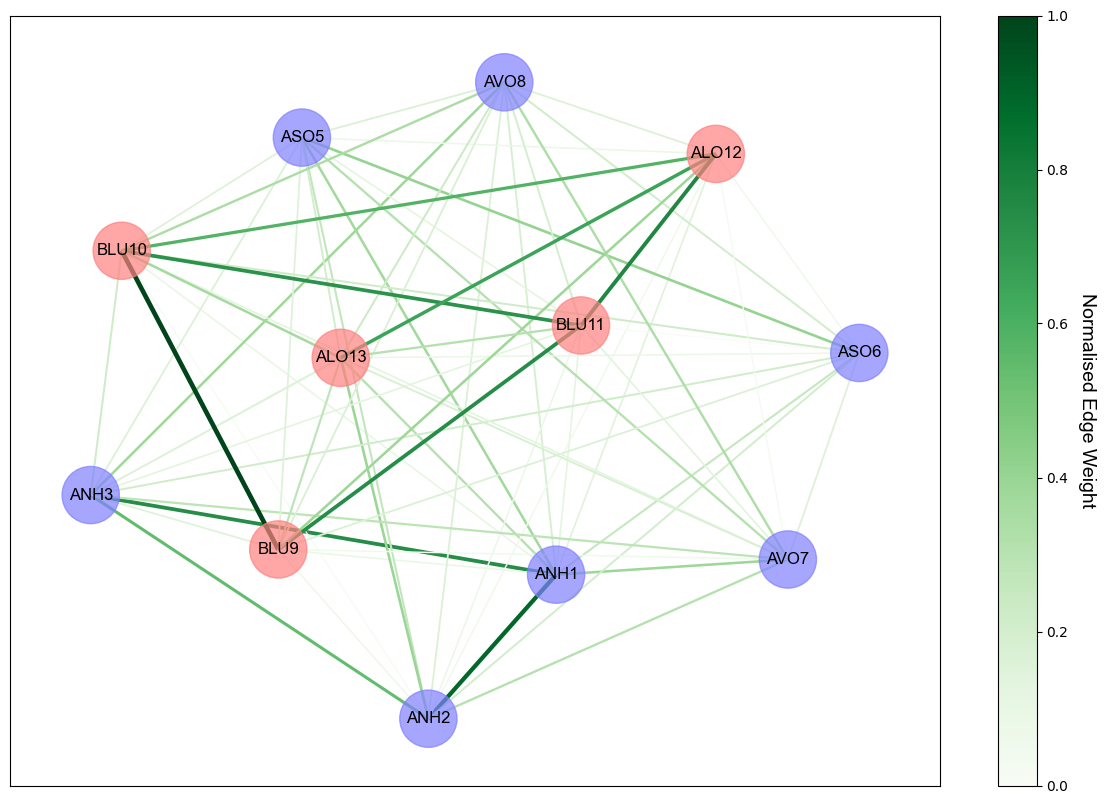

In [366]:
from matplotlib.font_manager import FontProperties

illustration_factor = 5

widths = nx.get_edge_attributes(G, 'weight')
# Multiply the edge widths by a factor of 10 for illustration
widths = {k: v * illustration_factor for k, v in widths.items()}

# Extract the MI values from the dictionary
mi_values = list(widths.values())

# Normalize the MI values to [0, 1]
min_value = min(mi_values)
max_value = max(mi_values)
normalized_mi = [((x - min_value) / (max_value - min_value)) for x in mi_values]


nodelist = G.nodes()

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1700,
                       node_color=list(inputdict.values()),
                       alpha=0.7)
edge_color = nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       edge_color=normalized_mi,
                       width=list(widths.values()),
                       edge_cmap=plt.cm.Greens,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_family="Arial")
plt.box(True)


cbar = plt.colorbar(edge_color)
font_properties = FontProperties(family='Arial', style='normal', weight='normal', size=14)

cbar.ax.set_ylabel('Normalised Edge Weight', rotation=270, labelpad=20, font_properties=font_properties)

plt.savefig("/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/figS1.png", format="png", dpi=300, bbox_inches="tight")

plt.show()




## Test stability relative to the baseline (patient's first assessment)

In [435]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Psychosis', 'Depression', 'SESleep', 'Anhedonia', 'Asociality',
       'Avolition', 'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


In [436]:
G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:13])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'))

In [437]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = best_partition(G, weight='weight')
partition

{'ANH1': 1,
 'ANH2': 1,
 'ANH3': 1,
 'ASO5': 1,
 'ASO6': 1,
 'AVO7': 1,
 'AVO8': 1,
 'BLU9': 0,
 'BLU10': 0,
 'BLU11': 0,
 'ALO12': 0,
 'ALO13': 0}

## plot baseline network

In [352]:
from collections import defaultdict

inputdict = partition.copy()
reverse = defaultdict(list)
for key, value in inputdict.items():
    reverse[value].append(key)
    
for key in reverse[0]:
    inputdict[key] = "#FF8080"
for key in reverse[1]:
    inputdict[key] = "#8080FF"
    

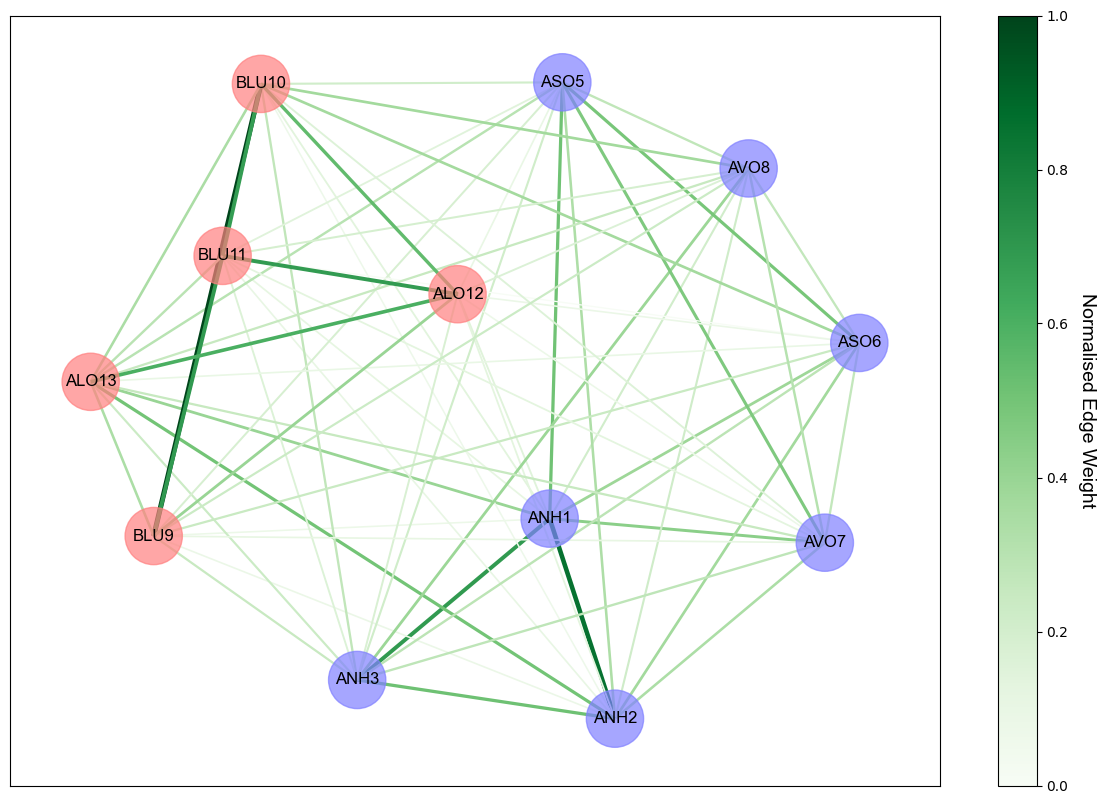

In [355]:
from matplotlib.font_manager import FontProperties

illustration_factor = 5

widths = nx.get_edge_attributes(G, 'weight')
# Multiply the edge widths by a factor of 10 for illustration
widths = {k: v * illustration_factor for k, v in widths.items()}

# Extract the MI values from the dictionary
mi_values = list(widths.values())

# Normalize the MI values to [0, 1]
min_value = min(mi_values)
max_value = max(mi_values)
normalized_mi = [((x - min_value) / (max_value - min_value)) for x in mi_values]


nodelist = G.nodes()

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1700,
                       node_color=list(inputdict.values()),
                       alpha=0.7)
edge_color = nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       edge_color=normalized_mi,
                       width=list(widths.values()),
                       edge_cmap=plt.cm.Greens,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_family="Arial")
plt.box(True)


cbar = plt.colorbar(edge_color)
font_properties = FontProperties(family='Arial', style='normal', weight='normal', size=14)

cbar.ax.set_ylabel('Normalised Edge Weight', rotation=270, labelpad=20, font_properties=font_properties)

plt.savefig("/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/fig1.png", format="png", dpi=300, bbox_inches="tight")

plt.show()




## Now calculate follow up network and stats

In [438]:
partition_baseline = partition

group_baseline_1 = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8']
group_baseline_0 = ['BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']

In [439]:
# Choose a random row from each client and see how the graph changes.
# Repeat this num_of_samples times
times_out_of_community = partition_baseline.fromkeys(GG_nodes, 0)

partitions = []
ARIs = []

translate_par_to_par_baseline = {}
num_of_samples = 5000
for k in range(num_of_samples):
    
    translate_par_to_par_baseline = {}
    
    # Create an empty Dataframe with column names only
    reduced_df = pd.DataFrame(columns=['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'])
    # The unique ClientsID
    Clients = df_all_at_least_2['ClientID'].unique()

    # Choose a random row from each client
    for i in Clients:
        df_client = df_all_at_least_2.loc[df_all_at_least_2['ClientID'] == i]
        client_reduced = df_client[['ClientID',
                                           'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']]
        num_of_client_rows = (client_reduced.shape[0])
        rand_row = random.randint(0, num_of_client_rows-1)
        client_values = client_reduced.iloc[[rand_row]]
        reduced_df = pd.concat([reduced_df, client_values], ignore_index=True)

        # reduced_df = reduced_df.append(client_values, ignore_index = True)

    G = nx.Graph()
    G.add_nodes_from(reduced_df.columns[1:])
    GG_nodes = list(G.nodes)
    edges_with_weights = [] 
    for idx, a in enumerate(GG_nodes[:-1]):
        for b in GG_nodes[idx+1:] : 
            mi = calc_MI(reduced_df[a].values, reduced_df[b].values)
            edges_with_weights.append((a,b,mi))
        
    G.add_weighted_edges_from(edges_with_weights)
    partition = community_louvain.best_partition(G, weight='weight')
        
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                     round(statistics.mean([partition[x] for x in group_baseline_1])):1}
    
    for node in GG_nodes:
        if (partition[node] in translate_par_to_par_baseline.keys()):
            partition[node] = translate_par_to_par_baseline[partition[node]]
        else:
            if not (0 in translate_par_to_par_baseline.values()):
                partition[node] = 0
            else:
                if not (1 in translate_par_to_par_baseline.values()):
                    partition[node] = 1
                else:
                    if not (2 in translate_par_to_par_baseline.values()):
                        partition[node] = 2   
    
    for node in GG_nodes:
        if partition[node] != partition_baseline[node]:
            times_out_of_community[node] += 1
    
    partitions.append(partition)
    ARIs = list(np.append(ARIs, sklearn.metrics.adjusted_rand_score(list(partition_baseline.values()),
                                                        list(partition.values()))))
      
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                  round(statistics.mean([partition[x] for x in group_baseline_1])):1}

In [440]:
# Find the unique dictionaries (the unique partitions)
unique_partitions = list(map(dict, set(tuple(sorted(sub.items())) for sub in partitions)))

In [441]:
## Count the number of times each partition appears in the list

num_of_unique_partitions = len(unique_partitions)
count_partitions = np.zeros(num_of_unique_partitions)
for i in range(num_of_samples):
    for j in range(num_of_unique_partitions):
        if partitions[i]==unique_partitions[j]:
            count_partitions[j] = count_partitions[j] + 1
            
count_partitions

array([3.000e+00, 2.800e+01, 4.918e+03, 3.000e+00, 1.000e+00, 1.000e+00,
       4.600e+01])

In [442]:
np.mean(ARIs)

0.9945946891249289

In [443]:
print(times_out_of_community)

{'ANH1': 6, 'ANH2': 6, 'ANH3': 6, 'ASO5': 4, 'ASO6': 4, 'AVO7': 3, 'AVO8': 32, 'BLU9': 3, 'BLU10': 3, 'BLU11': 3, 'ALO12': 3, 'ALO13': 50}


In [444]:
sum(ARIs) / len(ARIs)


0.9945946891249278

In [168]:
np.percentile(ARIs, 2.5)

1.0

In [169]:
np.percentile(ARIs, 50)

1.0

In [171]:
np.percentile(ARIs, 97.5)

1.0

## Add Depression to the graph

In [390]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Psychosis', 'SESleep', 'Anhedonia', 'Asociality',
       'Avolition', 'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


In [391]:
G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression'))

In [392]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition

{'ANH1': 1,
 'ANH2': 1,
 'ANH3': 1,
 'ASO5': 1,
 'ASO6': 1,
 'AVO7': 1,
 'AVO8': 1,
 'BLU9': 0,
 'BLU10': 0,
 'BLU11': 0,
 'ALO12': 0,
 'ALO13': 0,
 'Depression': 1}

In [395]:
from collections import defaultdict

inputdict = partition.copy()
reverse = defaultdict(list)
for key, value in inputdict.items():
    reverse[value].append(key)
    
for key in reverse[0]:
    inputdict[key] = "#FF8080"
for key in reverse[1]:
    inputdict[key] = "#8080FF"

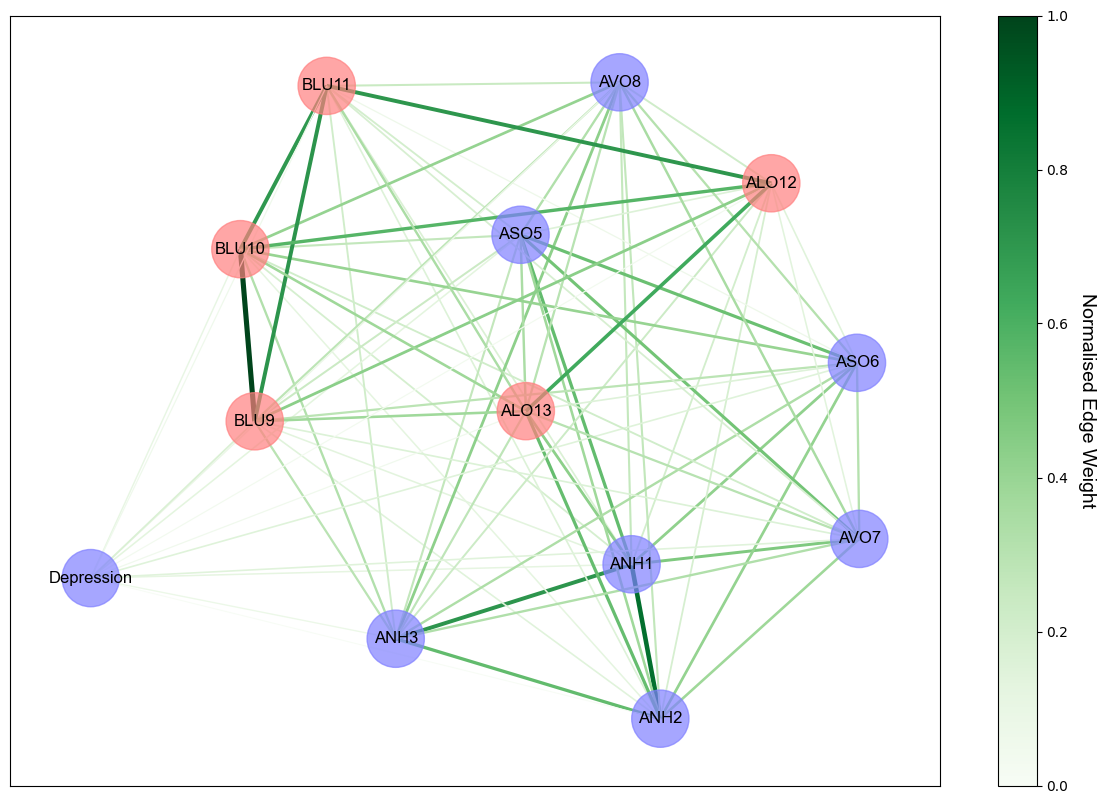

In [396]:
from matplotlib.font_manager import FontProperties

illustration_factor = 5

widths = nx.get_edge_attributes(G, 'weight')
# Multiply the edge widths by a factor of 10 for illustration
widths = {k: v * illustration_factor for k, v in widths.items()}

# Extract the MI values from the dictionary
mi_values = list(widths.values())

# Normalize the MI values to [0, 1]
min_value = min(mi_values)
max_value = max(mi_values)
normalized_mi = [((x - min_value) / (max_value - min_value)) for x in mi_values]


nodelist = G.nodes()

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1700,
                       node_color=list(inputdict.values()),
                       alpha=0.7)
edge_color = nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                      #  width=widths_times_5,
                       edge_color=normalized_mi,
                       width=list(widths.values()),
                      #  edge_color=list(widths.values()),
                       edge_cmap=plt.cm.Greens,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_family="Arial")
plt.box(True)


cbar = plt.colorbar(edge_color)
font_properties = FontProperties(family='Arial', style='normal', weight='normal', size=14)

cbar.ax.set_ylabel('Normalised Edge Weight', rotation=270, labelpad=20, font_properties=font_properties)

plt.savefig("/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/figS2.png", format="png", dpi=300, bbox_inches="tight")

plt.show()




## Add Sedation

In [397]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Psychosis', 'Depression', 'Anhedonia', 'Asociality', 'Avolition',
       'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


In [398]:
G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep'))

In [399]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition

{'ANH1': 0,
 'ANH2': 0,
 'ANH3': 0,
 'ASO5': 0,
 'ASO6': 0,
 'AVO7': 0,
 'AVO8': 0,
 'BLU9': 1,
 'BLU10': 1,
 'BLU11': 1,
 'ALO12': 1,
 'ALO13': 1,
 'SESleep': 0}

In [400]:
from collections import defaultdict

inputdict = partition.copy()
reverse = defaultdict(list)
for key, value in inputdict.items():
    reverse[value].append(key)
    
for key in reverse[0]:
    inputdict[key] = "#8080FF"
for key in reverse[1]:
    inputdict[key] = "#FF8080"

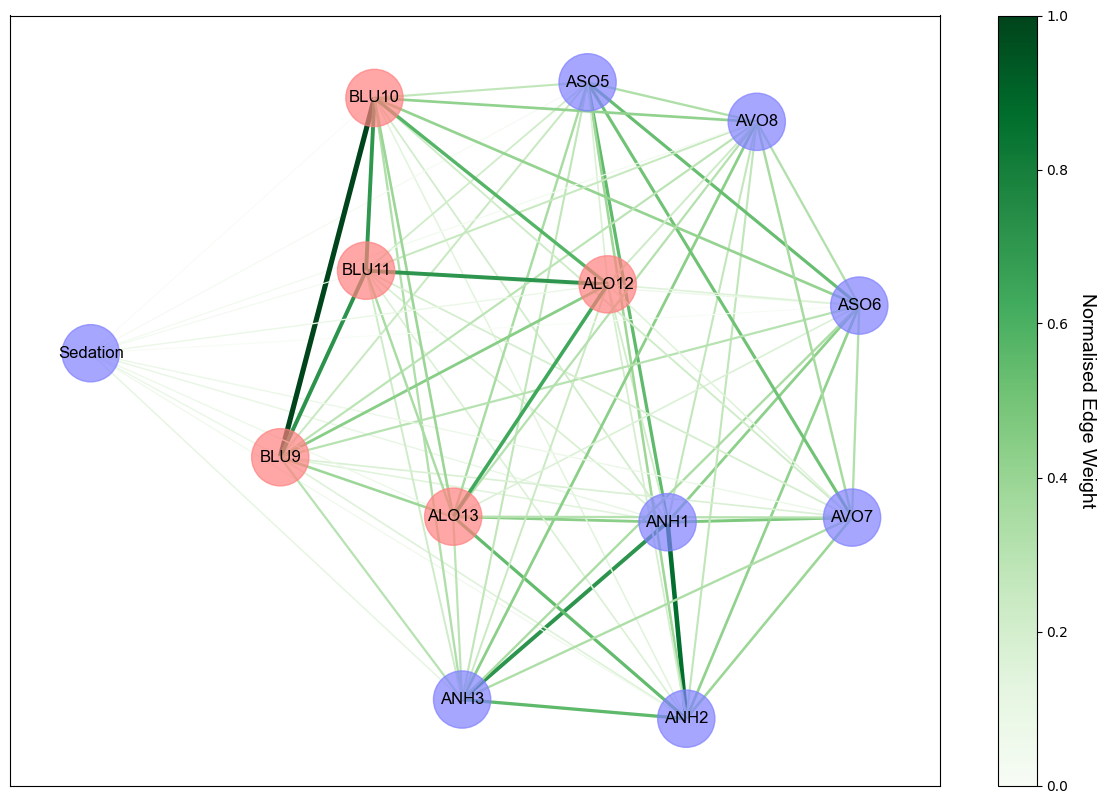

In [402]:
from matplotlib.font_manager import FontProperties

# Rename the node 'SESleep' to 'Sedation'
G = nx.relabel_nodes(G, {'SESleep': 'Sedation'})


illustration_factor = 5

widths = nx.get_edge_attributes(G, 'weight')
# Multiply the edge widths by a factor of 10 for illustration
widths = {k: v * illustration_factor for k, v in widths.items()}

# Extract the MI values from the dictionary
mi_values = list(widths.values())

# Normalize the MI values to [0, 1]
min_value = min(mi_values)
max_value = max(mi_values)
normalized_mi = [((x - min_value) / (max_value - min_value)) for x in mi_values]


nodelist = G.nodes()

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1700,
                       node_color=list(inputdict.values()),
                       alpha=0.7)
edge_color = nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                      #  width=widths_times_5,
                       edge_color=normalized_mi,
                       width=list(widths.values()),
                      #  edge_color=list(widths.values()),
                       edge_cmap=plt.cm.Greens,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_family="Arial")
plt.box(True)


cbar = plt.colorbar(edge_color)
font_properties = FontProperties(family='Arial', style='normal', weight='normal', size=14)

cbar.ax.set_ylabel('Normalised Edge Weight', rotation=270, labelpad=20, font_properties=font_properties)

plt.savefig("/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/figS4.png", format="png", dpi=300, bbox_inches="tight")

plt.show()




## Add psychosis

In [403]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Depression', 'SESleep', 'Anhedonia', 'Asociality',
       'Avolition', 'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


In [404]:
G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis'))

In [405]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition

{'ANH1': 1,
 'ANH2': 1,
 'ANH3': 1,
 'ASO5': 1,
 'ASO6': 1,
 'AVO7': 1,
 'AVO8': 1,
 'BLU9': 0,
 'BLU10': 0,
 'BLU11': 0,
 'ALO12': 0,
 'ALO13': 0,
 'Psychosis': 1}

In [408]:
from collections import defaultdict

inputdict = partition.copy()
reverse = defaultdict(list)
for key, value in inputdict.items():
    reverse[value].append(key)
    
for key in reverse[0]:
    inputdict[key] = "#FF8080"
for key in reverse[1]:
    inputdict[key] = "#8080FF"

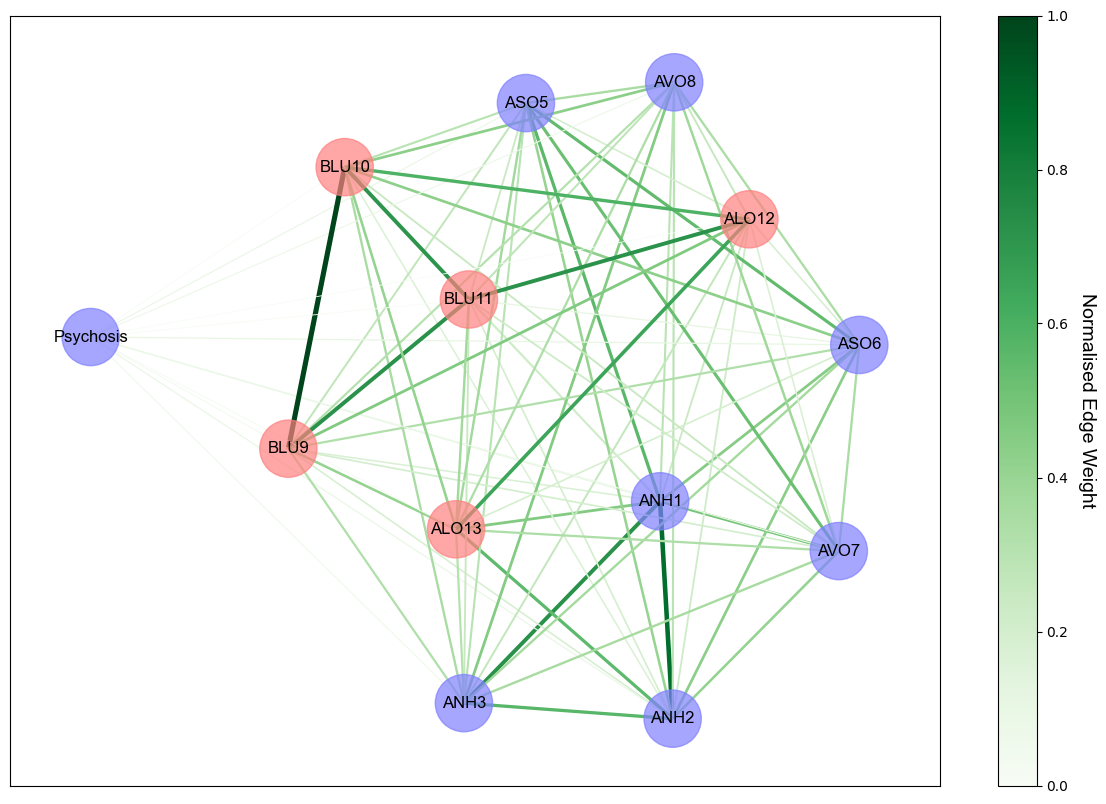

In [409]:
from matplotlib.font_manager import FontProperties

illustration_factor = 5

widths = nx.get_edge_attributes(G, 'weight')
# Multiply the edge widths by a factor of 10 for illustration
widths = {k: v * illustration_factor for k, v in widths.items()}

# Extract the MI values from the dictionary
mi_values = list(widths.values())

# Normalize the MI values to [0, 1]
min_value = min(mi_values)
max_value = max(mi_values)
normalized_mi = [((x - min_value) / (max_value - min_value)) for x in mi_values]


nodelist = G.nodes()

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1700,
                       node_color=list(inputdict.values()),
                       alpha=0.7)
edge_color = nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                      #  width=widths_times_5,
                       edge_color=normalized_mi,
                       width=list(widths.values()),
                      #  edge_color=list(widths.values()),
                       edge_cmap=plt.cm.Greens,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_family="Arial")
plt.box(True)


cbar = plt.colorbar(edge_color)
font_properties = FontProperties(family='Arial', style='normal', weight='normal', size=14)

cbar.ax.set_ylabel('Normalised Edge Weight', rotation=270, labelpad=20, font_properties=font_properties)

plt.savefig("/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/figS2.png", format="png", dpi=300, bbox_inches="tight")

plt.show()




## Now test for stability of network with depression included

In [454]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)


G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])

GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = best_partition(G, weight='weight')

In [456]:
partition_baseline = partition
# print(partition_baseline)
group_baseline_0 = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'Depression']
group_baseline_1 = ['BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']

In [457]:

# Choose a random row from each client and see how the graph changes.
# Repeat this num_of_samples times
times_out_of_community = partition_baseline.fromkeys(GG_nodes, 0)

partitions = []
ARIs = []

translate_par_to_par_baseline = {}
num_of_samples = 5000
for k in range(num_of_samples):
    
    translate_par_to_par_baseline = {}
    
    # Create an empty Dataframe with column names only
    reduced_df = pd.DataFrame(columns=['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression'])
    # The unique ClientsID
    Clients = df_all_at_least_2['ClientID'].unique()

    # Choose a random row from each client
    for i in Clients:
        df_client = df_all_at_least_2.loc[df_all_at_least_2['ClientID'] == i]
        client_reduced = df_client[['ClientID',
                                           'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Depression']]
        num_of_client_rows = (client_reduced.shape[0])
        rand_row = random.randint(0, num_of_client_rows-1)
        client_values = client_reduced.iloc[[rand_row]]
        reduced_df = pd.concat([reduced_df, client_values], ignore_index=True)

        # reduced_df = reduced_df.append(client_values, ignore_index = True)

    G = nx.Graph()
    G.add_nodes_from(reduced_df.columns[1:])
    GG_nodes = list(G.nodes)
    edges_with_weights = [] 
    for idx, a in enumerate(GG_nodes[:-1]):
        for b in GG_nodes[idx+1:] : 
            mi = calc_MI(reduced_df[a].values, reduced_df[b].values)
            edges_with_weights.append((a,b,mi))
        
    G.add_weighted_edges_from(edges_with_weights)
    partition = community_louvain.best_partition(G, weight='weight')
        
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                     round(statistics.mean([partition[x] for x in group_baseline_1])):1}
    
    for node in GG_nodes:
        if (partition[node] in translate_par_to_par_baseline.keys()):
            partition[node] = translate_par_to_par_baseline[partition[node]]
        else:
            if not (0 in translate_par_to_par_baseline.values()):
                partition[node] = 0
            else:
                if not (1 in translate_par_to_par_baseline.values()):
                    partition[node] = 1
                else:
                    if not (2 in translate_par_to_par_baseline.values()):
                        partition[node] = 2   
    
    for node in GG_nodes:
        if partition[node] != partition_baseline[node]:
            times_out_of_community[node] += 1
    
    partitions.append(partition)
    ARIs = list(np.append(ARIs, sklearn.metrics.adjusted_rand_score(list(partition_baseline.values()),
                                                        list(partition.values()))))
      
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                  round(statistics.mean([partition[x] for x in group_baseline_1])):1}

In [458]:
# Find the unique dictionaries (the unique partitions)
unique_partitions = list(map(dict, set(tuple(sorted(sub.items())) for sub in partitions)))

In [459]:
## Count the number of times each partition appears in the list

num_of_unique_partitions = len(unique_partitions)
count_partitions = np.zeros(num_of_unique_partitions)
for i in range(num_of_samples):
    for j in range(num_of_unique_partitions):
        if partitions[i]==unique_partitions[j]:
            count_partitions[j] = count_partitions[j] + 1
            

In [460]:
print(times_out_of_community)

{'ANH1': 12, 'ANH2': 12, 'ANH3': 12, 'ASO5': 0, 'ASO6': 0, 'AVO7': 1, 'AVO8': 41, 'BLU9': 0, 'BLU10': 0, 'BLU11': 0, 'ALO12': 0, 'ALO13': 25, 'Depression': 272}


In [464]:
sum(ARIs) / len(ARIs)

0.9782520610914945

In [462]:
np.percentile(ARIs, 2.5)

0.691699604743083

In [ ]:
np.percentile(ARIs, 50)

In [463]:
np.percentile(ARIs, 97.5)

1.0

## now stability with psychosis

In [465]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)

G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])
G.nodes

GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Depression', 'SESleep', 'Anhedonia', 'Asociality',
       'Avolition', 'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


{'ANH1': 1,
 'ANH2': 1,
 'ANH3': 1,
 'ASO5': 1,
 'ASO6': 1,
 'AVO7': 1,
 'AVO8': 1,
 'BLU9': 0,
 'BLU10': 0,
 'BLU11': 0,
 'ALO12': 0,
 'ALO13': 0,
 'Psychosis': 1}

In [468]:
partition_baseline = partition
# print(partition_baseline)
group_baseline_1 = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'Psychosis']
group_baseline_0 = ['BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']

In [469]:
# Choose a random row from each client and see how the graph changes.
# Repeat this num_of_samples times
times_out_of_community = partition_baseline.fromkeys(GG_nodes, 0)

partitions = []
ARIs = []

translate_par_to_par_baseline = {}
num_of_samples = 5000
for k in range(num_of_samples):
    
    translate_par_to_par_baseline = {}
    
    # Create an empty Dataframe with column names only
    reduced_df = pd.DataFrame(columns=['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis'])
    # The unique ClientsID
    Clients = df_all_at_least_2['ClientID'].unique()

    # Choose a random row from each client
    for i in Clients:
        df_client = df_all_at_least_2.loc[df_all_at_least_2['ClientID'] == i]
        client_reduced = df_client[['ClientID',
                                           'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'Psychosis']]
        num_of_client_rows = (client_reduced.shape[0])
        rand_row = random.randint(0, num_of_client_rows-1)
        client_values = client_reduced.iloc[[rand_row]]
        reduced_df = pd.concat([reduced_df, client_values], ignore_index=True)

        # reduced_df = reduced_df.append(client_values, ignore_index = True)

    G = nx.Graph()
    G.add_nodes_from(reduced_df.columns[1:])
    GG_nodes = list(G.nodes)
    edges_with_weights = [] 
    for idx, a in enumerate(GG_nodes[:-1]):
        for b in GG_nodes[idx+1:] : 
            mi = calc_MI(reduced_df[a].values, reduced_df[b].values)
            edges_with_weights.append((a,b,mi))
        
    G.add_weighted_edges_from(edges_with_weights)
    partition = community_louvain.best_partition(G, weight='weight')
        
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                     round(statistics.mean([partition[x] for x in group_baseline_1])):1}
    
    for node in GG_nodes:
        if (partition[node] in translate_par_to_par_baseline.keys()):
            partition[node] = translate_par_to_par_baseline[partition[node]]
        else:
            if not (0 in translate_par_to_par_baseline.values()):
                partition[node] = 0
            else:
                if not (1 in translate_par_to_par_baseline.values()):
                    partition[node] = 1
                else:
                    if not (2 in translate_par_to_par_baseline.values()):
                        partition[node] = 2   
    
    for node in GG_nodes:
        if partition[node] != partition_baseline[node]:
            times_out_of_community[node] += 1
    
    partitions.append(partition)
    ARIs = list(np.append(ARIs, sklearn.metrics.adjusted_rand_score(list(partition_baseline.values()),
                                                        list(partition.values()))))
      
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                  round(statistics.mean([partition[x] for x in group_baseline_1])):1}

In [470]:
# Find the unique dictionaries (the unique partitions)
unique_partitions = list(map(dict, set(tuple(sorted(sub.items())) for sub in partitions)))

## Count the number of times each partition appears in the list
num_of_unique_partitions = len(unique_partitions)
count_partitions = np.zeros(num_of_unique_partitions)
for i in range(num_of_samples):
    for j in range(num_of_unique_partitions):
        if partitions[i]==unique_partitions[j]:
            count_partitions[j] = count_partitions[j] + 1
            
print(times_out_of_community)

print(sum(ARIs) / len(ARIs))

print(np.percentile(ARIs, 2.5))

print(np.percentile(ARIs, 97.5))



{'ANH1': 25, 'ANH2': 25, 'ANH3': 25, 'ASO5': 11, 'ASO6': 12, 'AVO7': 8, 'AVO8': 41, 'BLU9': 8, 'BLU10': 8, 'BLU11': 8, 'ALO12': 9, 'ALO13': 33, 'Psychosis': 157}
0.9854224279719439
0.691699604743083
1.0


## now for sleep

In [471]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)

G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:14])
G.nodes

GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

partition = community_louvain.best_partition(G, weight='weight')
partition


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Psychosis', 'Depression', 'Anhedonia', 'Asociality', 'Avolition',
       'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


{'ANH1': 0,
 'ANH2': 0,
 'ANH3': 0,
 'ASO5': 0,
 'ASO6': 0,
 'AVO7': 0,
 'AVO8': 0,
 'BLU9': 1,
 'BLU10': 1,
 'BLU11': 1,
 'ALO12': 1,
 'ALO13': 1,
 'SESleep': 0}

In [472]:
partition_baseline = partition
# print(partition_baseline)
group_baseline_0 = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'SESleep']
group_baseline_1 = ['BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']

In [473]:
# Choose a random row from each client and see how the graph changes.
# Repeat this num_of_samples times
times_out_of_community = partition_baseline.fromkeys(GG_nodes, 0)

partitions = []
ARIs = []

translate_par_to_par_baseline = {}
num_of_samples = 5000
for k in range(num_of_samples):
    
    translate_par_to_par_baseline = {}
    
    # Create an empty Dataframe with column names only
    reduced_df = pd.DataFrame(columns=['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep'])
    # The unique ClientsID
    Clients = df_all_at_least_2['ClientID'].unique()

    # Choose a random row from each client
    for i in Clients:
        df_client = df_all_at_least_2.loc[df_all_at_least_2['ClientID'] == i]
        client_reduced = df_client[['ClientID',
                                           'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'SESleep']]
        num_of_client_rows = (client_reduced.shape[0])
        rand_row = random.randint(0, num_of_client_rows-1)
        client_values = client_reduced.iloc[[rand_row]]
        reduced_df = pd.concat([reduced_df, client_values], ignore_index=True)

        # reduced_df = reduced_df.append(client_values, ignore_index = True)

    G = nx.Graph()
    G.add_nodes_from(reduced_df.columns[1:])
    GG_nodes = list(G.nodes)
    edges_with_weights = [] 
    for idx, a in enumerate(GG_nodes[:-1]):
        for b in GG_nodes[idx+1:] : 
            mi = calc_MI(reduced_df[a].values, reduced_df[b].values)
            edges_with_weights.append((a,b,mi))
        
    G.add_weighted_edges_from(edges_with_weights)
    partition = community_louvain.best_partition(G, weight='weight')
        
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                     round(statistics.mean([partition[x] for x in group_baseline_1])):1}
    
    for node in GG_nodes:
        if (partition[node] in translate_par_to_par_baseline.keys()):
            partition[node] = translate_par_to_par_baseline[partition[node]]
        else:
            if not (0 in translate_par_to_par_baseline.values()):
                partition[node] = 0
            else:
                if not (1 in translate_par_to_par_baseline.values()):
                    partition[node] = 1
                else:
                    if not (2 in translate_par_to_par_baseline.values()):
                        partition[node] = 2   
    
    for node in GG_nodes:
        if partition[node] != partition_baseline[node]:
            times_out_of_community[node] += 1
    
    partitions.append(partition)
    ARIs = list(np.append(ARIs, sklearn.metrics.adjusted_rand_score(list(partition_baseline.values()),
                                                        list(partition.values()))))
      
    translate_par_to_par_baseline = {round(statistics.mean([partition[x] for x in group_baseline_0])):0,
                                  round(statistics.mean([partition[x] for x in group_baseline_1])):1}

In [474]:
# Find the unique dictionaries (the unique partitions)
unique_partitions = list(map(dict, set(tuple(sorted(sub.items())) for sub in partitions)))

## Count the number of times each partition appears in the list
num_of_unique_partitions = len(unique_partitions)
count_partitions = np.zeros(num_of_unique_partitions)
for i in range(num_of_samples):
    for j in range(num_of_unique_partitions):
        if partitions[i]==unique_partitions[j]:
            count_partitions[j] = count_partitions[j] + 1
            
print(times_out_of_community)

print(sum(ARIs) / len(ARIs))

print(np.percentile(ARIs, 2.5))

print(np.percentile(ARIs, 97.5))



{'ANH1': 11, 'ANH2': 11, 'ANH3': 11, 'ASO5': 3, 'ASO6': 3, 'AVO7': 2, 'AVO8': 38, 'BLU9': 1, 'BLU10': 1, 'BLU11': 1, 'ALO12': 2, 'ALO13': 51, 'SESleep': 716}
0.9492930430189297
0.691699604743083
1.0


## Centrality

In [ ]:
#### All patients

## A dataframe with only the baseline (first assessment) of each patient

# Create empty dataframes with column names only
df_first = pd.DataFrame(columns = ['ClientID', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
                                       'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                       'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
                                       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                                       'SESleep', 'Psychosis', 'Depresion',
                                       'Anhedonia', 'Distress', 'Asociality', 'Avolition',
                                       'BluntedAffect', 'Alogia'])


# The unique ClientsID
Clients = df_all['ClientID'].unique()

for i in Clients:
    df_client = df_all.loc[df_all['ClientID'] == i]
    client_values_first = df_client.iloc[[0]]
    df_first = df_first.append(client_values_first, ignore_index = True)
    


## Construct the graph for first assessment
df_first.columns

In [ ]:
# Just ANH1-ALO13
df = df_first[['ClientID',
               'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']]

In [ ]:
## Choose one of the following subsets of nodes:

In [ ]:
# With Psychosis (sum of P1-P7)
#df = df_first[['ClientID',
#               'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
#               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
#               'Psychosis']]

In [ ]:
# With Depression (sum of Q1-Q9)
#df = df_first[['ClientID',
#               'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
#               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
#               'Depresion']]

In [ ]:
# With Sedation (SESleep)
df = df_first[['ClientID',
               'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
               'SESleep']]

In [ ]:
# With Alcohol (AlcoholUnits)
#df = df_means[['ClientID',
#               'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
#               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13',
#               'Alcohol']]

## Construct the graph

In [ ]:
df.columns

In [ ]:
G = nx.Graph()
G.add_nodes_from(df.columns[1:])
G.nodes

In [ ]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df[a].values, df[b].values)
        length = 1/mi
        G.add_edge(a, b, weight = mi, length = length)     


In [ ]:
partition = community_louvain.best_partition(G, weight='weight')
partition 

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
nx.get_edge_attributes(G, 'weight')

## Centrality of the nodes

In [257]:
# Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through
# that node. The higher - the more central.
bet = nx.betweenness_centrality(G, weight='weight', endpoints=False)
print(bet)

{'ANH1': 0.0, 'ANH2': 0.03636363636363636, 'ANH3': 0.0, 'ASO5': 0.0, 'ASO6': 0.0, 'AVO7': 0.03636363636363636, 'AVO8': 0.0, 'BLU9': 0.14545454545454545, 'BLU10': 0.0, 'BLU11': 0.0, 'ALO12': 0.0, 'ALO13': 0.0}


In [259]:
# Cluster coefficient is the geometric average of the subgraph edge weights (of all the triangles with the
# node):
# 1/{deg(u)*[deg(u)-1]} * sum_over_v_w{weight_u_v*weight_u_w*weight_v_w}   
clu = nx.clustering(G, nodes={'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'}, weight='weight')
print(clu)

{'ANH1': 0.5420078794524067, 'BLU11': 0.5026948704320768, 'ANH3': 0.5046102553188787, 'ALO13': 0.5293095187737282, 'BLU9': 0.4694282247924196, 'ASO6': 0.5071022315506635, 'AVO7': 0.48399743600999456, 'ALO12': 0.5194828370004495, 'ASO5': 0.4889651450843074, 'BLU10': 0.49120955809890976, 'AVO8': 0.5188711794908945, 'ANH2': 0.4947654611327499}


In [ ]:
# Matrix (data frame) of centrality
column_names = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6','AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11',
             'ALO12', 'ALO13', 'SESleep']
row_names = ['Betweenness', 'Cluster_coefficient']

matrix = np.zeros((len(row_names), len(column_names)))
centrality_df = pd.DataFrame(matrix, columns=column_names, index=row_names)
centrality_df

In [208]:
# Create empty dataframes with column names only
columns = ['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']
df_first_at_least_2 = pd.DataFrame(columns=columns)
df_later_at_least_2 = pd.DataFrame(columns=columns)

# Using groupby to group by 'ClientID' and then apply a function to split data
for _, group in df_all_at_least_2.groupby('ClientID'):
    if len(group) >= 2:
        df_first_at_least_2 = pd.concat([df_first_at_least_2, group.iloc[[0]]], ignore_index=True)
        df_later_at_least_2 = pd.concat([df_later_at_least_2, group.iloc[1:]], ignore_index=True)

# Printing the columns
print(df_first_at_least_2.columns)


Index(['ClientID', 'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8',
       'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Psychosis', 'Depression', 'SESleep', 'Anhedonia', 'Asociality',
       'Avolition', 'BluntedAffect', 'Alogia', 'at_least_2'],
      dtype='object')


In [209]:
G = nx.Graph()
G.add_nodes_from(df_first_at_least_2.columns[1:13])
G.nodes

NodeView(('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'))

In [210]:
GG_nodes = list(G.nodes)
edges_with_weights = [] 

for idx, a in enumerate(GG_nodes[:-1]):
    for b in GG_nodes[idx+1:] : 
        mi = calc_MI(df_first_at_least_2[a].values, df_first_at_least_2[b].values)
        edges_with_weights.append((a,b,mi))
        
G.add_weighted_edges_from(edges_with_weights)

In [211]:
# Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through
# that node. The higher - the more central.
bet = nx.betweenness_centrality(G, weight='weight', endpoints=False)
print(bet)

{'ANH1': 0.0, 'ANH2': 0.07272727272727272, 'ANH3': 0.0, 'ASO5': 0.0, 'ASO6': 0.03636363636363636, 'AVO7': 0.0, 'AVO8': 0.0, 'BLU9': 0.01818181818181818, 'BLU10': 0.0, 'BLU11': 0.03636363636363636, 'ALO12': 0.0, 'ALO13': 0.0}


In [212]:
# Cluster coefficient is the geometric average of the subgraph edge weights (of all the triangles with the
# node):
# 1/{deg(u)*[deg(u)-1]} * sum_over_v_w{weight_u_v*weight_u_w*weight_v_w}   
clu = nx.clustering(G, nodes={'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'}, weight='weight')
print(clu)

{'ANH1': 0.485352545365296, 'BLU11': 0.4535924085618998, 'ANH3': 0.47414552713060354, 'ALO13': 0.48077775414352814, 'BLU9': 0.4699393778118777, 'ASO6': 0.448179842296224, 'AVO7': 0.44834307296493836, 'ALO12': 0.4537408264519644, 'ASO5': 0.46484423585559254, 'BLU10': 0.4915127072482185, 'AVO8': 0.45345065724519135, 'ANH2': 0.46957318039159784}


In [213]:
key_order = ('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13')
clu_current = dict(collections.OrderedDict((k, clu[k]) for k in key_order))
clu_current

{'ANH1': 0.485352545365296,
 'ANH2': 0.46957318039159784,
 'ANH3': 0.47414552713060354,
 'ASO5': 0.46484423585559254,
 'ASO6': 0.448179842296224,
 'AVO7': 0.44834307296493836,
 'AVO8': 0.45345065724519135,
 'BLU9': 0.4699393778118777,
 'BLU10': 0.4915127072482185,
 'BLU11': 0.4535924085618998,
 'ALO12': 0.4537408264519644,
 'ALO13': 0.48077775414352814}

In [214]:
# Matrix (data frame) of centrality
column_names = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6','AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11',
             'ALO12', 'ALO13']
row_names = ['Betweenness', 'Cluster_coefficient']

matrix = np.zeros((len(row_names), len(column_names)))
centrality_df_at_least_2 = pd.DataFrame(matrix, columns=column_names, index=row_names)
centrality_df_at_least_2

,ANH1,ANH2,ANH3,ASO5,ASO6,AVO7,AVO8,BLU9,BLU10,BLU11,ALO12,ALO13
Betweenness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster_coefficient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
for node in GG_nodes:
        
    centrality_df_at_least_2[node]['Betweenness'] = bet[node]
    centrality_df_at_least_2[node]['Cluster_coefficient'] = clu[node]

centrality_df_at_least_2

,ANH1,ANH2,ANH3,ASO5,ASO6,AVO7,AVO8,BLU9,BLU10,BLU11,ALO12,ALO13
Betweenness,0.000000,0.072727,0.000000,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.036364,0.000000,0.000000
Cluster_coefficient,0.485353,0.469573,0.474146,0.464844,0.448180,0.448343,0.453451,0.469939,0.491513,0.453592,0.453741,0.480778


In [198]:
# Copy table to Excel
centrality_df_at_least_2.to_clipboard(excel=True)

In [204]:
# Data frames of centrality

column_names = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6','AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11',
             'ALO12', 'ALO13']

Betweenness_df_at_least_2 = pd.DataFrame(columns=column_names)
Cluster_coefficient_df_at_least_2 = pd.DataFrame(columns=column_names)


In [246]:
# Choose a random row from each client and see how the centrality of the nodes changes.
# Repeat this num_of_samples times
times_out_of_community = partition_baseline.fromkeys(GG_nodes, 0)

translate_par_to_par_baseline = {}
num_of_samples = 5000

Betweenness_df_at_least_2 = pd.DataFrame(columns=['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7',
                                               'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'])
Cluster_coefficient_df_at_least_2 = pd.DataFrame(columns=['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7',
                                               'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'])


for k in range(num_of_samples):
    
    # Create an empty Dataframe with column names only
    reduced_df = pd.DataFrame(columns=['ClientID',
                                   'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                   'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'])
    # The unique ClientsID
    Clients = df_all_at_least_2['ClientID'].unique()

    # Choose a random row from each client
    for i in Clients:
        df_client = df_all_at_least_2.loc[df_all_at_least_2['ClientID'] == i]
        client_reduced = df_client[['ClientID',
                                           'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
                                           'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']]
        num_of_client_rows = (client_reduced.shape[0])
        rand_row = random.randint(0, num_of_client_rows-1)
        client_values = client_reduced.iloc[[rand_row]]
        reduced_df = pd.concat([reduced_df, client_values], ignore_index=True)

        # reduced_df = reduced_df.append(client_values, ignore_index = True)

    G = nx.Graph()
    G.add_nodes_from(reduced_df.columns[1:])
    GG_nodes = list(G.nodes)
    edges_with_weights = [] 
    for idx, a in enumerate(GG_nodes[:-1]):
        for b in GG_nodes[idx+1:] : 
            mi = calc_MI(reduced_df[a].values, reduced_df[b].values)
            edges_with_weights.append((a,b,mi))
        
    G.add_weighted_edges_from(edges_with_weights)
    
    bet_current = nx.betweenness_centrality(G, weight='weight', endpoints=False)
    clu_current = nx.clustering(G, nodes={'ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6',
               'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13'}, weight='weight')
    key_order = ('ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13')
    clu_current = dict(collections.OrderedDict((k, clu_current[k]) for k in key_order))
    
    
    bet_current_values_df_at_least_2 = pd.DataFrame(bet_current.values())
    bet_current_values_df_at_least_2 = bet_current_values_df_at_least_2.T
    bet_current_values_df_at_least_2.columns = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7',
                                               'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']
    clu_current_values_df_at_least_2 = pd.DataFrame(clu_current.values())
    clu_current_values_df_at_least_2 = clu_current_values_df_at_least_2.T
    clu_current_values_df_at_least_2.columns = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7',
                                               'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']
    Betweenness_df_at_least_2 = pd.concat([Betweenness_df_at_least_2, bet_current_values_df_at_least_2], ignore_index=True)
    Cluster_coefficient_df_at_least_2 = pd.concat([Cluster_coefficient_df_at_least_2, clu_current_values_df_at_least_2], ignore_index=True)
    
    
    


In [248]:
Cluster_coefficient_df_at_least_2

,ANH1,ANH2,ANH3,ASO5,ASO6,AVO7,AVO8,BLU9,BLU10,BLU11,ALO12,ALO13
0,0.487112,0.485213,0.491874,0.436399,0.402923,0.461598,0.471033,0.448827,0.472511,0.473977,0.436735,0.440137
1,0.460677,0.458927,0.459653,0.415460,0.430651,0.425688,0.449760,0.455001,0.456398,0.444983,0.434527,0.418494
2,0.411095,0.395197,0.411440,0.401024,0.375627,0.389069,0.407252,0.388574,0.410911,0.392466,0.407255,0.406597
3,0.531745,0.503300,0.479825,0.493026,0.451342,0.459729,0.470686,0.481929,0.500002,0.485950,0.485047,0.505434
4,0.536868,0.481974,0.507102,0.461108,0.449460,0.479199,0.508733,0.494889,0.528959,0.511813,0.510616,0.480439
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.516070,0.519027,0.514168,0.478239,0.455378,0.490264,0.503373,0.533053,0.503061,0.493554,0.487697,0.498469
4996,0.490904,0.489921,0.475800,0.457260,0.444333,0.453708,0.446175,0.481091,0.485395,0.478808,0.473869,0.466982
4997,0.482308,0.494909,0.488916,0.458154,0.437523,0.460179,0.496501,0.476123,0.470681,0.479801,0.444175,0.467399
4998,0.506081,0.474098,0.476032,0.434740,0.420875,0.446680,0.490916,0.503909,0.486122,0.468329,0.488153,0.466140


In [250]:
Betweenness_df_at_least_2_describe = Betweenness_df_at_least_2.describe(percentiles=[0.025, 0.5, 0.975])
Betweenness_df_at_least_2_describe

Coefficient_df_at_least_2_describe = Cluster_coefficient_df_at_least_2.describe(percentiles=[0.025, 0.5, 0.975])


In [242]:
Betweenness_df_at_least_2_describe

,ANH1,ANH2,ANH3,ASO5,ASO6,AVO7,AVO8,BLU9,BLU10,BLU11,ALO12,ALO13
count,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0
2.5%,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0
97.5%,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0
max,0.0,0.0,0.0,0.0,0.127273,0.036364,0.0,0.0,0.0,0.090909,0.0,0.0


In [252]:
#  for plot
Betweenness_low_CI = Betweenness_df_at_least_2_describe.loc["2.5%"].tolist()
Betweenness_high_CI = Betweenness_df_at_least_2_describe.loc["97.5%"].tolist()
Betweenness_mean = Betweenness_df_at_least_2_describe.loc["mean"].tolist()

In [253]:
#  for plot
Coefficient_low_CI = Coefficient_df_at_least_2_describe.loc["2.5%"].tolist()
Coefficient_high_CI = Coefficient_df_at_least_2_describe.loc["97.5%"].tolist()
Coefficient_mean = Coefficient_df_at_least_2_describe.loc["mean"].tolist()

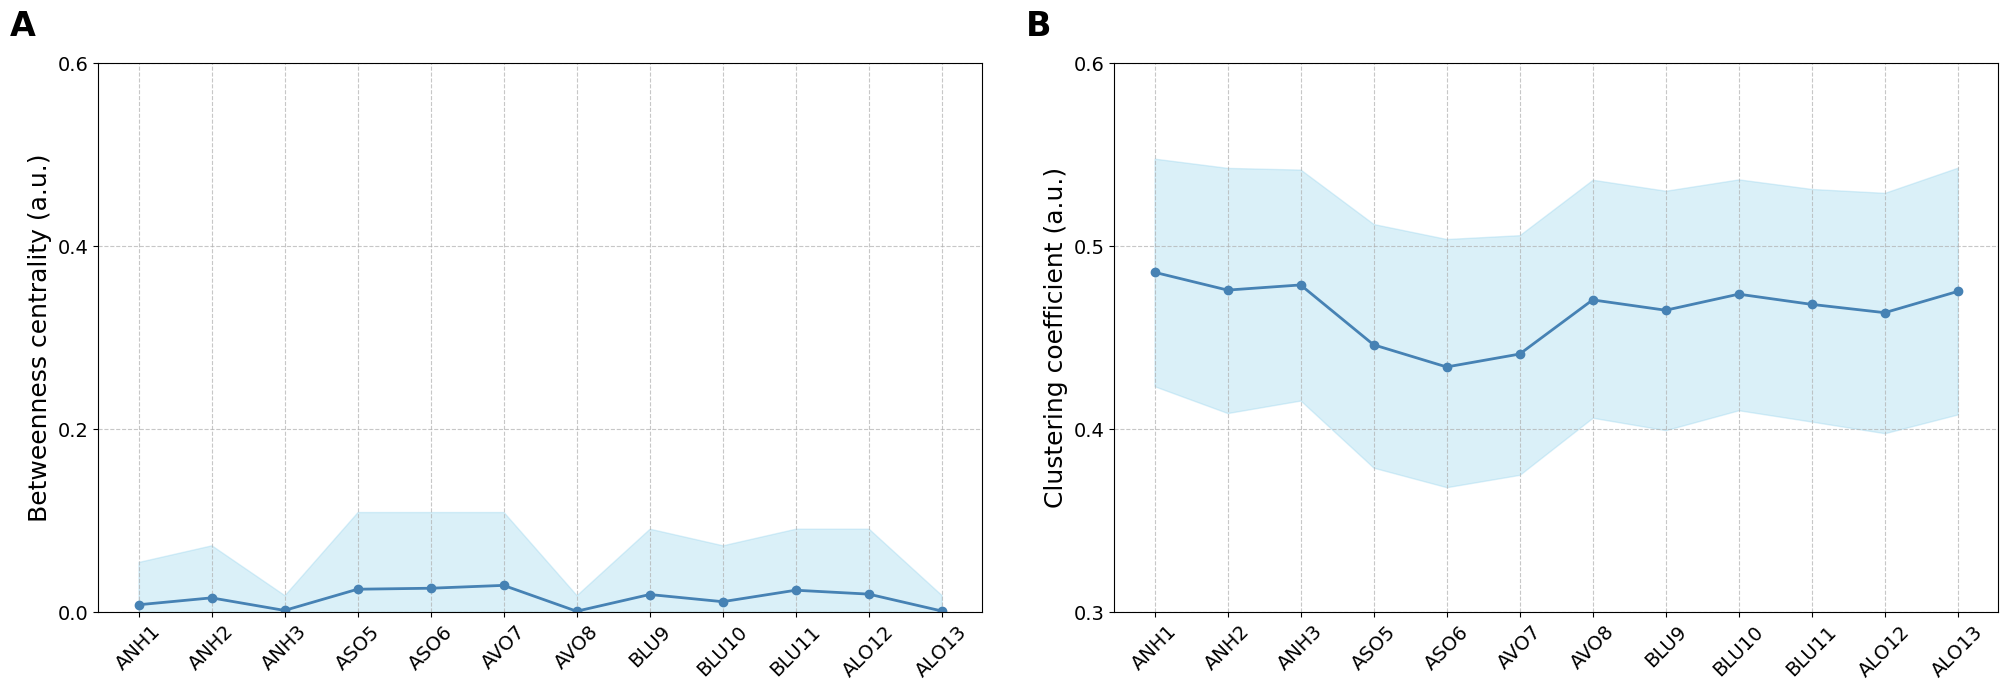

In [256]:
# plotting figure 2

import matplotlib.pyplot as plt

# Data for A: Betweenness Centrality

means_A = Betweenness_mean
lower_CI_A = Betweenness_low_CI
upper_CI_A = Betweenness_high_CI


means_B = Coefficient_mean
lower_CI_B = Coefficient_low_CI
upper_CI_B = Coefficient_high_CI

# Labels
labels = ['ANH1', 'ANH2', 'ANH3', 'ASO5', 'ASO6', 'AVO7', 'AVO8', 'BLU9', 'BLU10', 'BLU11', 'ALO12', 'ALO13']

fig, ax = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# Customizing aesthetics
line_color = 'steelblue'
fill_color = 'skyblue'

# Plot A: Betweenness centrality
ax[0].plot(means_A, color=line_color, linewidth=2, marker='o')
ax[0].fill_between(range(len(means_A)), lower_CI_A, upper_CI_A, color=fill_color, alpha=0.3)
ax[0].set_xticks(range(len(means_A)))
ax[0].set_xticklabels(labels, fontsize=14, rotation=45)
ax[0].set_ylim(0, 0.6)
ax[0].set_yticks([0, 0.2, 0.4, 0.6])
ax[0].tick_params(axis='y', labelsize=14)  
# ax[0].set_title('Cluster Coefficient', fontsize=16)
ax[0].set_ylabel('Betweenness centrality (a.u.)', fontsize=18)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Plot B: Clustering Coefficient
ax[1].plot(means_B, color=line_color, linewidth=2, marker='o')
ax[1].fill_between(range(len(means_B)), lower_CI_B, upper_CI_B, color=fill_color, alpha=0.3)
ax[1].set_xticks(range(len(means_B)))
ax[1].set_xticklabels(labels, fontsize=14, rotation=45)
ax[1].tick_params(axis='y', labelsize=14)  
ax[1].set_ylim(0.3, 0.6)
ax[1].set_yticks([0.3, 0.4, 0.5, 0.6])
# ax[1].set_title('Betweenness', fontsize=16)
ax[1].set_ylabel('Clustering coefficient (a.u.)', fontsize=18)

ax[1].grid(True, linestyle='--', alpha=0.7)

# Add "A" label to the first subplot
ax[0].text(-0.1, 1.05, 'A', transform=ax[0].transAxes, 
           size=24, weight='bold')

# Add "B" label to the second subplot
ax[1].text(-0.1, 1.05, 'B', transform=ax[1].transAxes, 
           size=24, weight='bold')

plt.tight_layout()  # Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.15)  # Adjust the width space between subplots

# Save the figure as a high-quality TIFF
plt.savefig('/Users/nwolpe/Library/CloudStorage/Dropbox/2023 - BNSS network/Manuscript/fig2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

